In [1]:
import pandas as pd
import pmdarima as pm
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [30]:
def train_and_forecast_arima(csv_path, column_to_predict):
    df = pd.read_csv(csv_path)
    df['date-time'] = pd.to_datetime(df['date-time'])
    df.set_index('date-time', inplace=True)
    
    if column_to_predict not in df.columns:
        raise ValueError(f"Column '{column_to_predict}' does not exist in the dataset")

    train_size = int(len(df) * 0.8)
    train, test = df.iloc[:train_size], df.iloc[train_size:]

    model = pm.auto_arima(train[column_to_predict], seasonal=False, trace=True, suppress_warnings=True)
    print(model.summary())

    forecast = model.predict(n_periods=len(test))

    forecast_series = pd.Series(forecast, index=test.index)
    print(forecast_series)

    rmse = np.sqrt(mean_squared_error(test[column_to_predict], forecast_series))
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    mape = mean_absolute_percentage_error(test[column_to_predict], forecast_series)
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

    plt.figure(figsize=(10, 6))
    plt.plot(test.index, test[column_to_predict], label='Actual', color='blue')
    plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
    plt.legend()
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-69890.779, Time=18.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-60361.527, Time=1.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-64383.459, Time=2.95 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=13.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-60363.527, Time=1.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-69986.288, Time=40.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-69169.743, Time=8.96 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=26.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-69887.901, Time=19.85 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=21.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-69898.869, Time=18.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-69888.173, Time=23.66 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=8.48 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 204.654 seconds
              

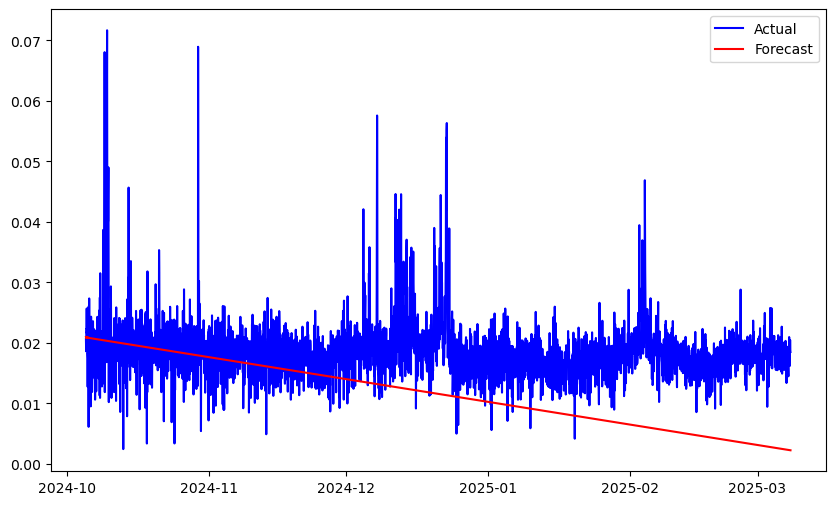

In [31]:
train_and_forecast_arima(
    "../data/aave_data/Core Market/Wrapped ETH.csv",
    "liquidityRate_avg"
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-93479.444, Time=8.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-81933.859, Time=2.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-87026.580, Time=2.98 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-93785.062, Time=7.80 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-81935.856, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-94069.573, Time=16.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-93136.222, Time=22.61 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-93723.053, Time=16.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-93857.655, Time=17.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-89624.098, Time=2.00 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-94081.642, Time=4.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-93805.447, Time=2.44 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-87028.575, Time=2.57 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-94149.550, Time=7.20 sec
 

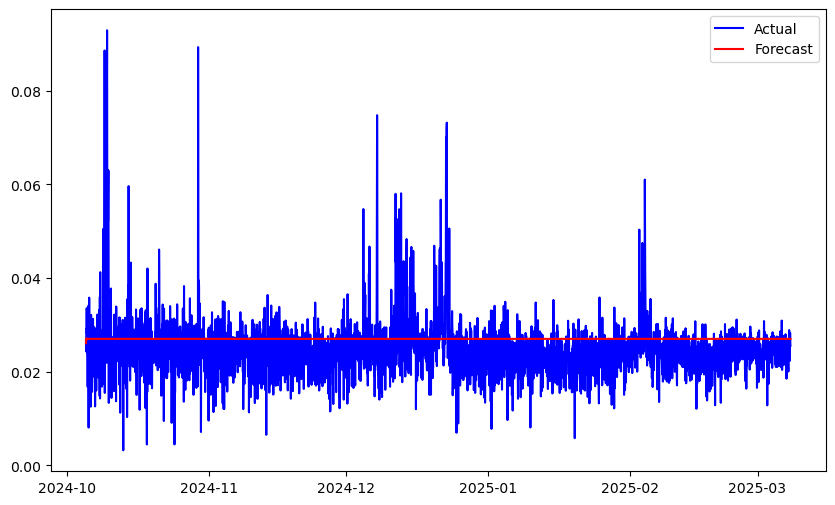

In [32]:
train_and_forecast_arima(
    "../data/aave_data/Core Market/Wrapped ETH.csv",
    "variableBorrowRate_avg"
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-52886.941, Time=2.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-52885.251, Time=0.63 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-52891.750, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-52891.647, Time=0.76 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-52890.261, Time=1.77 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-52890.395, Time=3.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-52888.543, Time=1.51 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-52916.931, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-52911.714, Time=1.90 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-52915.174, Time=1.86 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-52915.188, Time=3.68 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-52916.870, Time=3.84 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-52913.188, Time=1.85 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 24.739 sec

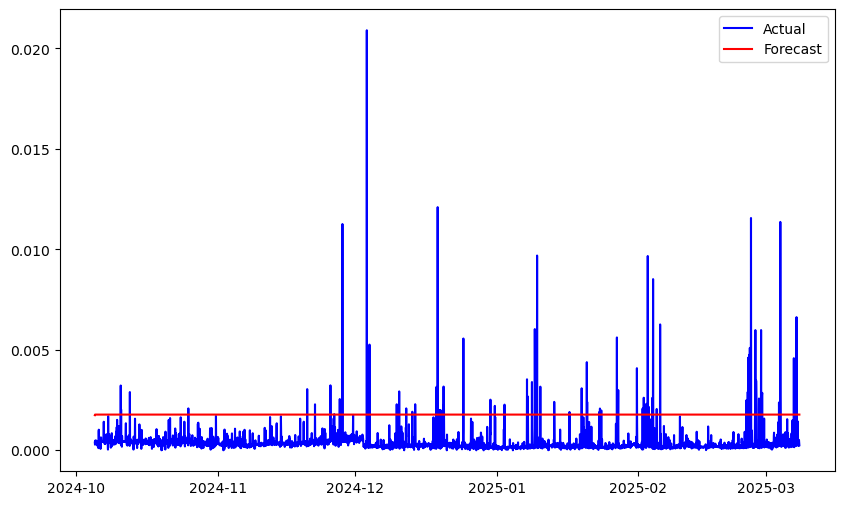

In [33]:
train_and_forecast_arima(
    "../data/aave_data/Core Market/Wrapped BTC.csv",
    "liquidityRate_avg"
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-108696.791, Time=15.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-100693.973, Time=2.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-103331.809, Time=3.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-106302.514, Time=4.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-100695.973, Time=0.89 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-108764.060, Time=16.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-108460.878, Time=7.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-108762.550, Time=22.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-108698.090, Time=16.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-108347.620, Time=29.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-108815.851, Time=42.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-108656.120, Time=15.18 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-108579.810, Time=

C:\Users\siam\anaconda3\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(4,1,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\siam\anaconda3\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\siam\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\siam\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "C:\Users\siam\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "C:\Users\siam\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 703, in fit
    mlefit = super().

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=-107047.949, Time=2.91 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=-108877.567, Time=23.20 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-107358.531, Time=22.89 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0]          
Total fit time: 481.969 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                14798
Model:               SARIMAX(4, 1, 1)   Log Likelihood               54468.217
Date:                Sat, 15 Mar 2025   AIC                        -108924.435
Time:                        15:31:54   BIC                        -108878.822
Sample:                    01-27-2023   HQIC                       -108909.291
                         - 10-05-2024                                         
Covariance Type:                  opg                                         
                 coe

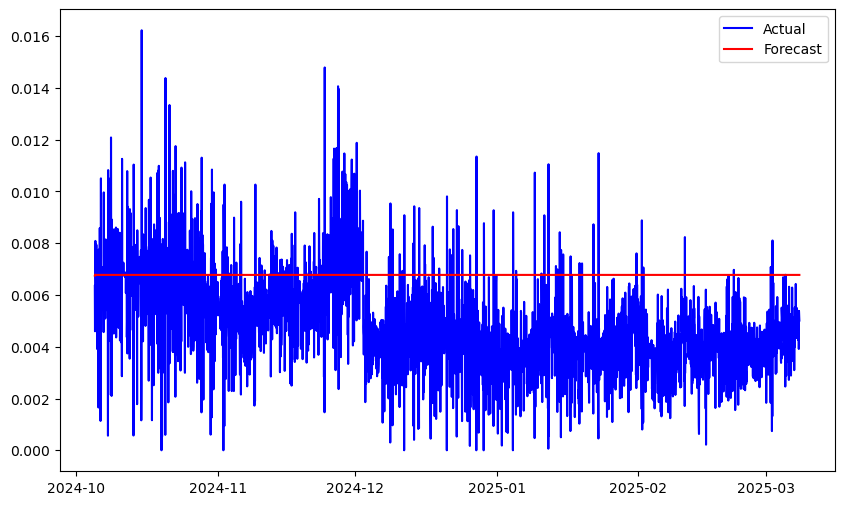

In [34]:
train_and_forecast_arima(
    "../data/aave_data/Core Market/Wrapped BTC.csv",
    "variableBorrowRate_avg"
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-71430.208, Time=27.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-64684.721, Time=3.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-68978.188, Time=1.82 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-71073.770, Time=12.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-64686.721, Time=1.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-71229.802, Time=19.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-71682.785, Time=32.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-71277.855, Time=11.95 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-70031.983, Time=1.98 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-71751.696, Time=23.97 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-70517.838, Time=4.93 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-71765.129, Time=36.77 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-70690.121, Time=4.26 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-71123.455, Time=25.80 s

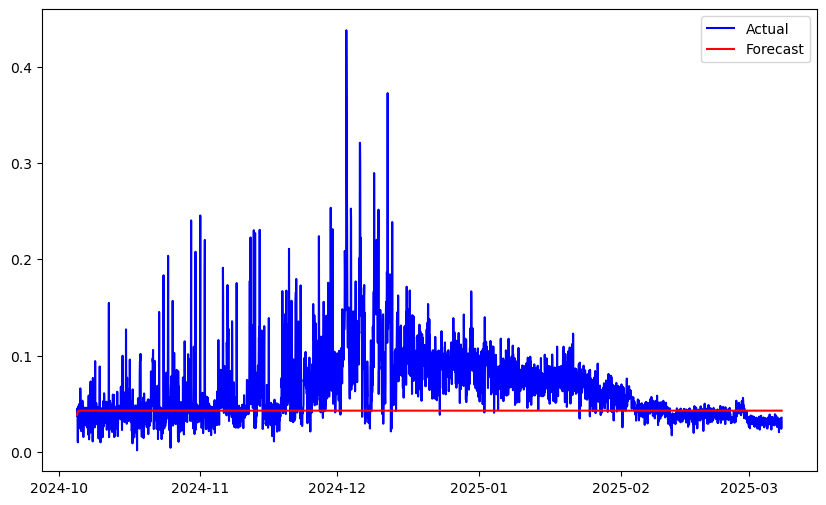

In [35]:
train_and_forecast_arima(
    "../data/aave_data/Core Market/USD Coin.csv",
    "liquidityRate_avg"
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-65063.538, Time=16.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-57896.817, Time=1.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-62329.782, Time=0.99 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-64909.658, Time=5.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-57898.817, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-64908.401, Time=8.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-65266.185, Time=15.67 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-64942.467, Time=14.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-63515.226, Time=1.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-65112.494, Time=19.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-64068.069, Time=2.97 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-65288.365, Time=21.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-65223.615, Time=25.93 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-64987.374, Time=24.60 se

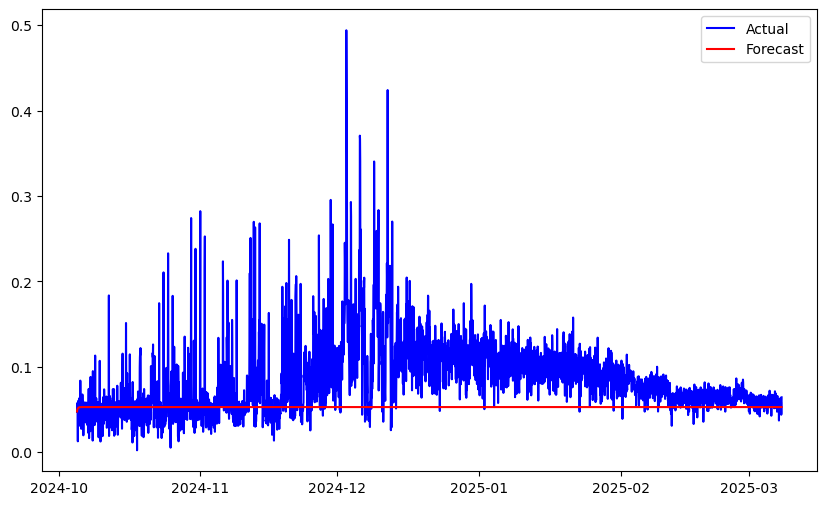

In [36]:
train_and_forecast_arima(
   "../data/aave_data/Core Market/USD Coin.csv",
    "variableBorrowRate_avg"
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-59499.382, Time=27.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-54637.778, Time=2.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-57517.125, Time=3.74 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-59416.547, Time=4.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-54639.778, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-59433.396, Time=8.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-59531.902, Time=15.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-59502.661, Time=7.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-58593.298, Time=5.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-59550.429, Time=15.52 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-59003.261, Time=7.57 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-59640.247, Time=19.52 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-59190.241, Time=7.92 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-59664.629, Time=22.13 sec


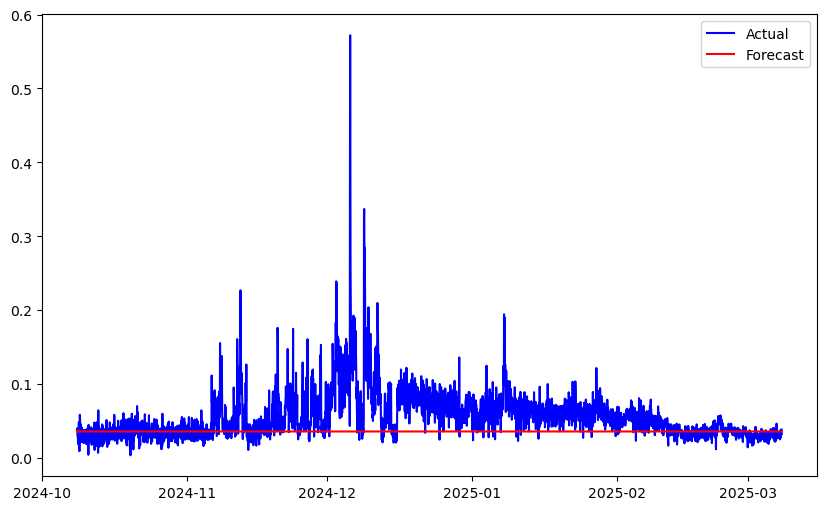

In [37]:
train_and_forecast_arima(
    "../data/aave_data/Core Market/Tether.csv",
    "liquidityRate_avg"
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-52868.967, Time=16.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-47422.266, Time=2.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-50562.871, Time=10.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-52808.321, Time=5.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-47424.266, Time=0.81 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-52821.227, Time=8.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-52894.529, Time=28.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-52872.137, Time=16.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-51774.991, Time=4.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-52914.327, Time=17.76 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-52259.738, Time=7.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-52969.222, Time=21.95 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-52483.349, Time=8.44 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-52940.290, Time=24.90 se

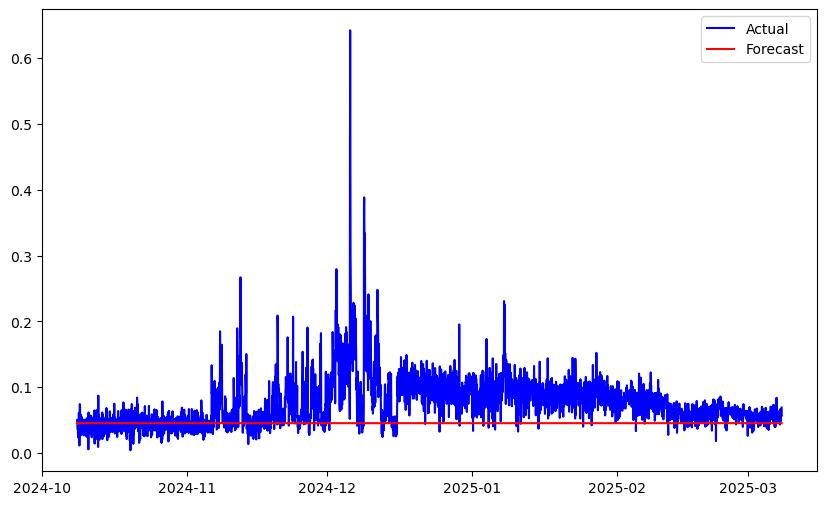

In [38]:
train_and_forecast_arima(
    "../data/aave_data/Core Market/Tether.csv",
    "variableBorrowRate_avg"
)